# 240222 통계 기반 시계열 분석 (1)

In [13]:
# !git clone https://github.com/Im-JihyunKim/2024_LGE_TimeSeries # colab 사용 시

In [14]:
# !pip install IPython  ## 패키지 설치
from IPython.display import Image

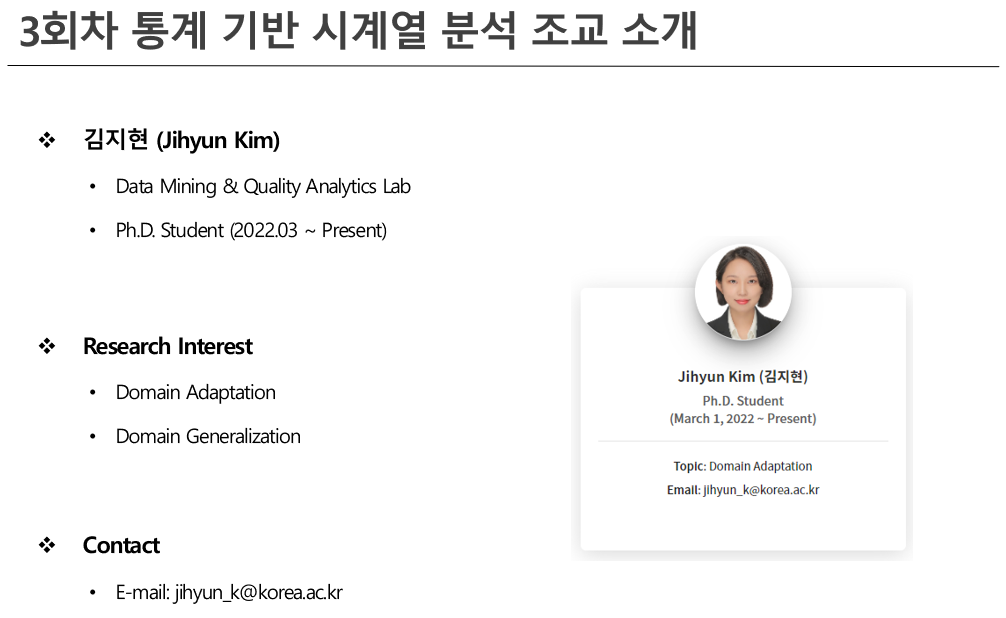

In [15]:
Image('image/img0.PNG') # 로컬 사용시
# Image('/content/2024_LGE_TimeSeries/image/img1.PNG') # colab 사용시

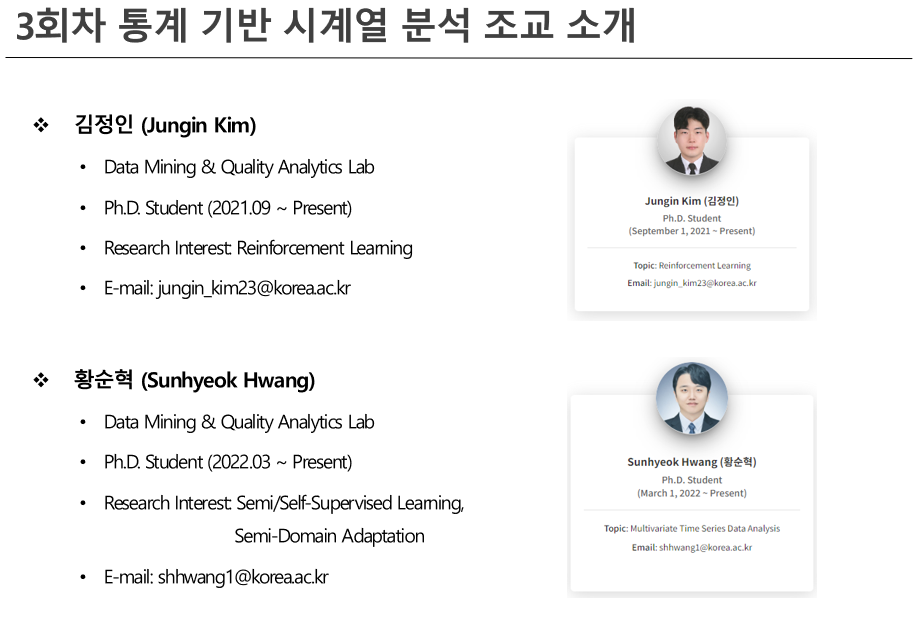

In [16]:
Image('image/img2.PNG') # 로컬 사용시
# Image('/content/2024_LGE_TimeSeries/image/img2.PNG') # colab 사용시

---------------------

## 1. 시계열 데이터 불러오고 관찰하기

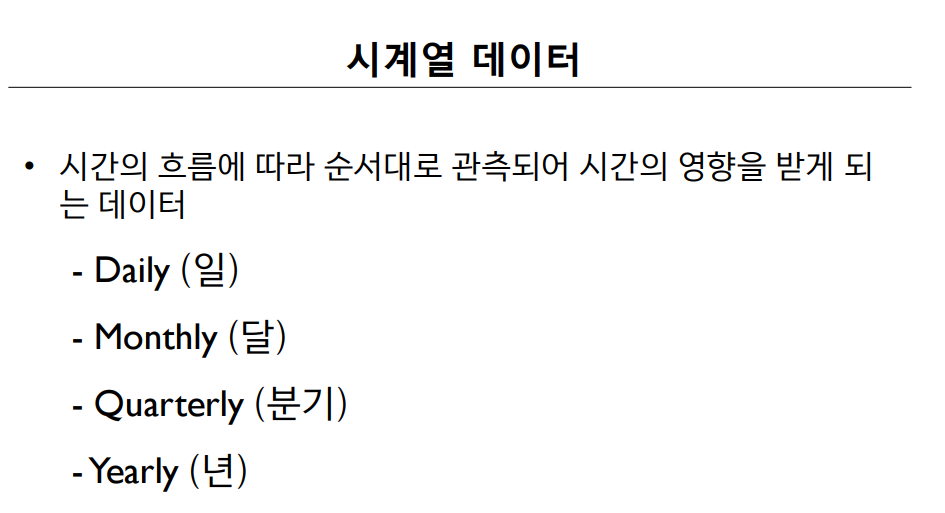

In [17]:
Image('image/1-1.PNG') # 로컬 사용시
# Image('/content/2024_LGE_TimeSeries/image/1-1.PNG') # colab 사용시

In [18]:
# 필요 라이브러리 불러오기
import os
import numpy as np  # 행렬 기반 연산, 벡터 연산에 적합
import pandas as pd # 이질적 자료형(dataframe) 연산에 적합
import matplotlib.pyplot as plt # 시각화 도구

# cf. 아래 방법과 같이 라이브러리 단순 호출(import)만으로도 동작 가능
# import numpy
# import pandas
# from matplotlib import pyplot

In [19]:
# 현재 데이터 위치 파악하기
print(os.getcwd())  # get current working directory (현재 경로 파악을 위함) -> 절대 경로가 output

e:\4_교육\2024 LG전자_실습교육\0222_시계열\2024_LGE_TimeSeries


In [20]:
# pandas(pd)를 이용한 데이터 읽기
airline_data = pd.read_csv('./dataset/international-airline-passengers.csv')
# airline_data = pd.read_csv('/content/2024_LGE_TimeSeries/dataset/international-airline-passengers.csv')  # colab 사용 시

# cf. 절대 경로 vs. 상대 경로
"e:/4_교육/2024 LG전자_실습교육/0222_시계열/2024_LGE_TimeSeries/dataset/international-airline-passengers.csv"
"./dataset/international-airline-passengers.csv"

'./dataset/international-airline-passengers.csv'

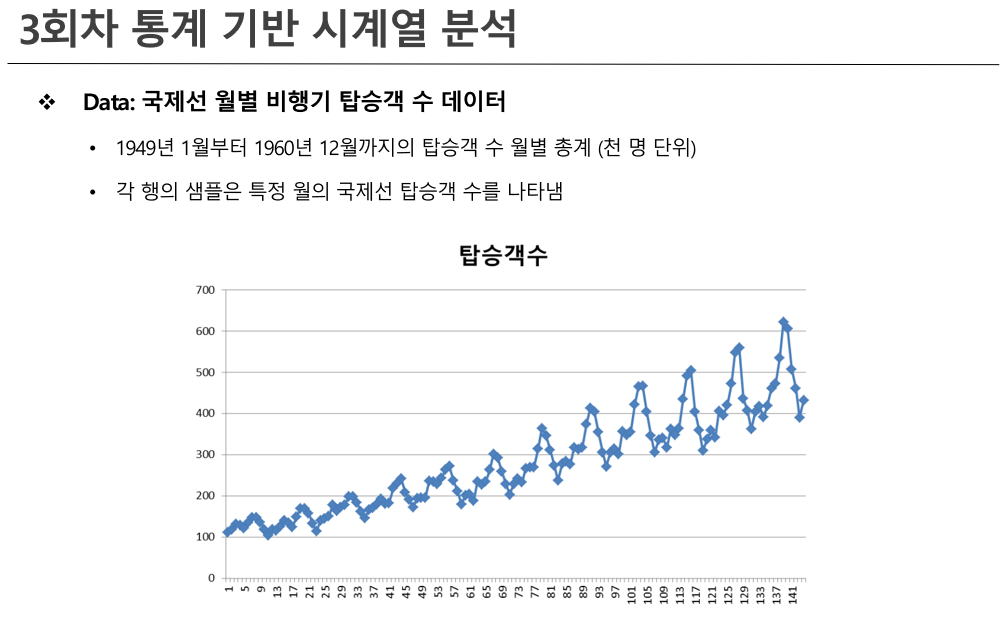

In [21]:
Image('image/1-3.PNG') # 로컬 사용시
# Image('/content/2024_LGE_TimeSeries/image/1-3.PNG') # colab 사용시

In [22]:
# 데이터 확인하기
airline_data.head(5)  # head(5) -> 데이터프레임의 상위 5개 행만 출력 (데이터가 잘 불러와졌는지 확인용)

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [23]:
# 데이터 column 이름 확인
airline_data.columns

Index(['Month', 'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')

In [24]:
# 데이터 형태 확인
airline_data.shape # 데이터 행 개수 X 열 개수

(145, 2)

In [25]:
# 데이터 컬럼 리스트 인덱싱하기
print("첫번째 컬럼명:",airline_data.columns[0])
print("두번째 컬럼명:",airline_data.columns[1])

첫번째 컬럼명: Month
두번째 컬럼명: International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60


In [26]:
# 데이터 컬럼명 수정하고, 수정된 내역 확인하기
airline_data.rename(columns={airline_data.columns[1]: 'passengers'}, inplace=True) # inplace = 변경된 데이터를 바로 저장
## airline_data = airline_data.rename(columns={airline_data.columns[1]: 'passengers'})
print("수정된 두번째 컬럼명:",airline_data.columns[1])

수정된 두번째 컬럼명: passengers


In [27]:
# 데이터 결측 여부를 확인. isnull()? Is it Null? 
airline_data.isnull() # True --> 데이터에 결측치가 있음. False --> 데이터에 결측치 없음

,Month,passengers
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
140,False,False
141,False,False
142,False,False
143,False,False


In [28]:
# 각 컬럼 별 데이터의 결측 개수를 확인함
# axis: {0: 행 / 1: 열} -> 덧셈 수행 레이블, 0은 모든 열의 요소들의 합, 1은 행의 요소들의 합이 됨.
airline_data.isnull().sum(axis=0)   # True --> 1. False --> 0.

Month         0
passengers    1
dtype: int64

In [29]:
# 인덱스(데이터 포인트 1개)마다 결측 데이터 개수를 확인함
airline_data.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
140    0
141    0
142    0
143    0
144    1
Length: 145, dtype: int64

In [30]:
# 데이터의 하단 5개를 출력함
airline_data.tail(5)

,Month,passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [31]:
# 결측 데이터를 제거하는 코드 ==> pandas.DataFrame.dropna() ; dropping na!
airline_data.dropna(inplace=True)

# 결측치 제거 후에도 결측치가 남아있는지 확인
airline_data.isnull().sum()

Month         0
passengers    0
dtype: int64

In [32]:
# 데이터의 하단 5개를 출력함
airline_data.tail(5)

,Month,passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [33]:
# 데이터 포인트(인덱스)를 Month 변수로 설정함
airline_data.set_index('Month', inplace=True)

# 연-월-별로 구성된 문자형 데이터를 날짜형 데이터로 변경함 (편의용)
airline_data.index=pd.to_datetime(airline_data.index)
airline_data

,passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [34]:
# 데이터 인덱스가 년-월-별로 구성되어 있는 것을 확인할 수 있음
airline_data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

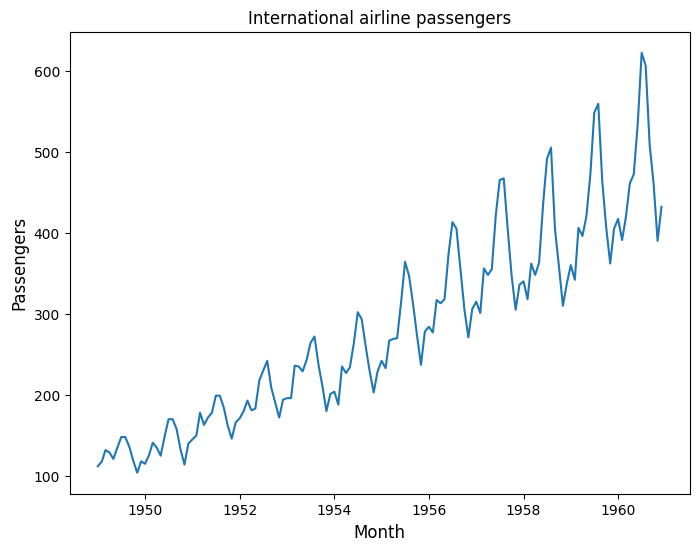

In [35]:
# 그림 그리기 확인
fig = plt.figure(figsize=(8,6)) # 그림 가로 세로 길이를 조절할 수 있음
plt.plot(airline_data['passengers']) # 어떤 요소를 그릴 것인지?
plt.title('International airline passengers', fontsize=12) # 그림 제목 명명
plt.xlabel('Month', fontsize=12) # 그림 내 X축 이름 명명
plt.ylabel('Passengers', fontsize=12) # 그림 내 Y축 이름 명명

# 그려진 그림 출력
plt.show()

# 그려진 그림 저장 (os.getcwd() 위치에 저장됨)
# plt.savefig("International airline passengers.png")

#### Insights from Line Chart
1) 일정한 주기로 유사한 패턴이 반복되는 경향
2) 시간의 흐름에 따라 값이 점점 증가하는 추세
3) 시간의 흐름에 따른 증가 추세의 변동이 점점 커지는 형태

## 2. 시계열 데이터 분해
- 시계열 데이터의 구성 요소
    1) 추세 변동 (Trend)
    2) 순환 변동 (Cycle)
    3) 계절 변동 (Seasonal Variations)
    4) 우연 변동 (Random Fluctuation)
- 시계열 데이터 분해란, 시계열 데이터를 구성하는 기본 요소(trend, seasonality, residuals) 등의 요소로 어떻게 구성되는지를 확인하는 것
    1) **덧셈 분해 (Additive Decomposition)**
        - 시계열 데이터가 추세, 계절성, 그리고 잔차의 **합**으로 표현될 수 있다고 가정
        - $Y_t=T_t+S_t+R_t$, 여기서 $Y_t$는 시간 $t$에서의 관측 값, $T_t$는 추세, $S_t$는 계절성, $R_t$는 잔차를 의미
        - 시계열 데이터의 **변동이 시간에 따라 상대적으로 일정할 때** 적합 (계절성 변동이나 추세에 따른 변동의 절대적 크기가 비슷하게 유지한 경우)
    2) **곱셈 분해 (Multiplicative Decomposition)**
        - 시계열 데이터가 추세, 계절성, 그리고 잔차의 **곱**으로 표현될 수 있다고 가정
        - $Y_t=T_t\times S_t\times R_t$, 여기서 각 기호는 덧셈 분해 때와 동일한 요소를 나타냄
        - 시계열 데이터의 **변동이 시간에 따라 비례하여 변할 때** 적합 (계절성 변동이나 추세가 데이터 크기에 따라 비례하여 증가 혹은 감소하는 경우)

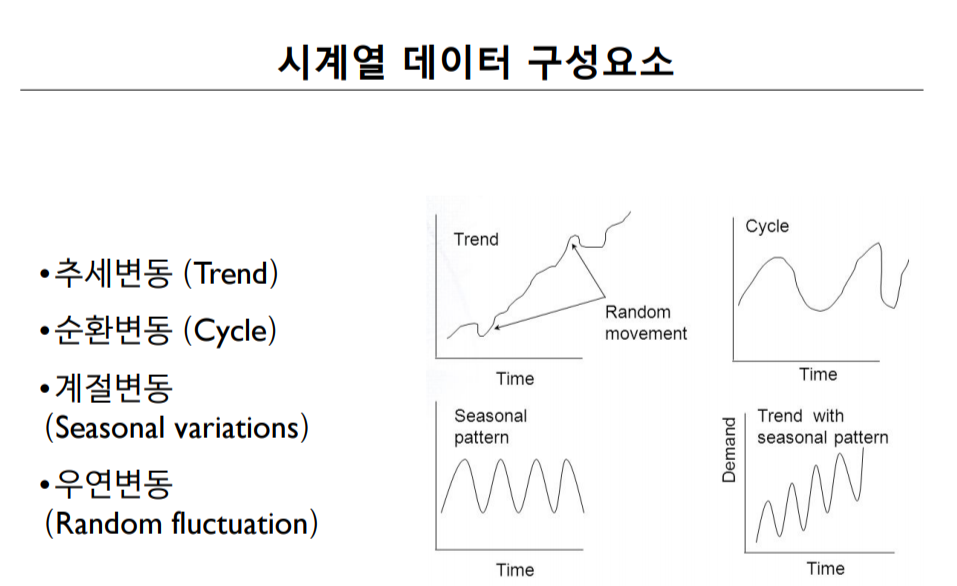

In [36]:
Image('image/1-2.PNG') # 로컬 사용시
# Image('/content/2024_LGE_TimeSeries/image/1-2.PNG') # colab 사용시

In [37]:
# 라이브러리 import
# !pip install statsmodels  ## 패키지 설치
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
# 시계열 원본 데이터 = 추세성*계절성*랜덤성 (multiplicable)
# 계절성은 12 step으로 존재한다고 가정함 (monthly)
multiple_results = seasonal_decompose(airline_data['passengers'], model='multiplicable', period=12)  # 곱셈 분해

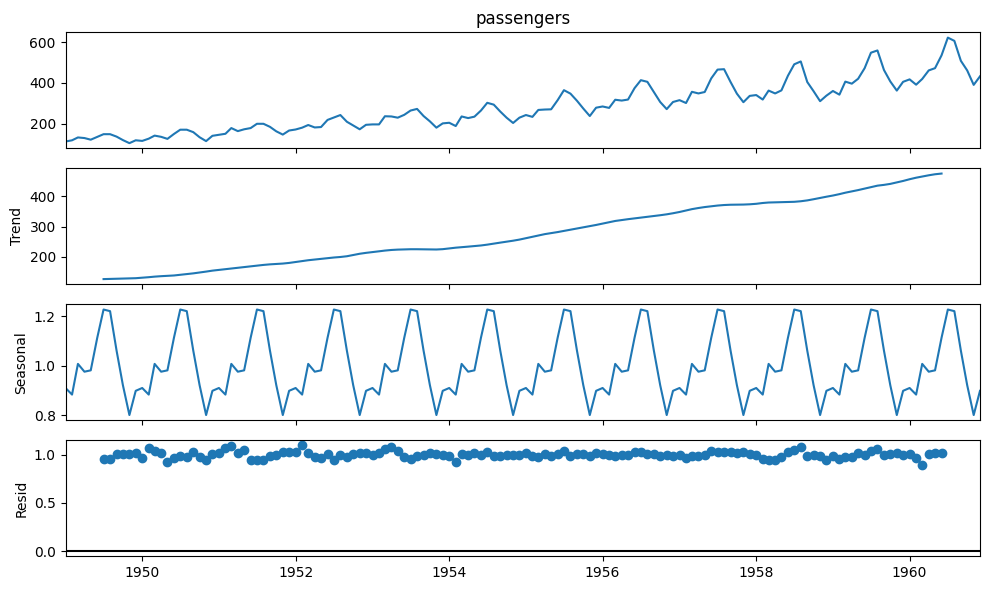

In [39]:
# 시계열 데이터 분해 후, 분해된 그림 확인하기

plt.rcParams['figure.figsize']=[10,6] # 그림의 가로 및 세로 크기 설정 옵션
multiple_results.plot() # 그림 그리기
plt.show(); # 그림 출력하기
# plt.savefig('decomposed plot.png')

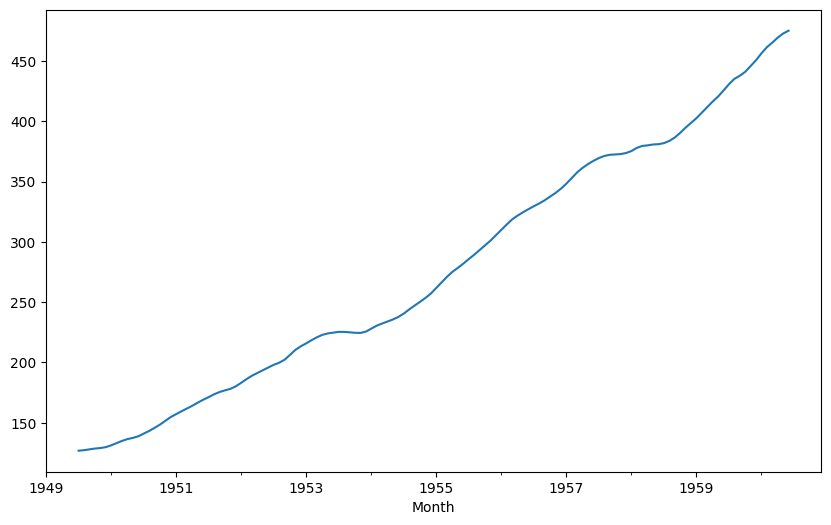

In [40]:
# 트렌드 그림만 확인하기
multiple_results.trend.plot();

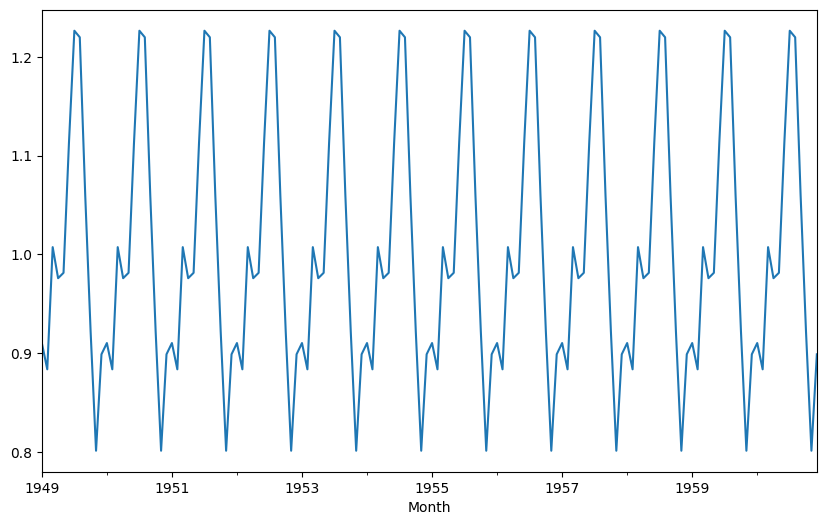

In [41]:
# 계절성 그림만 확인하기
multiple_results.seasonal.plot();

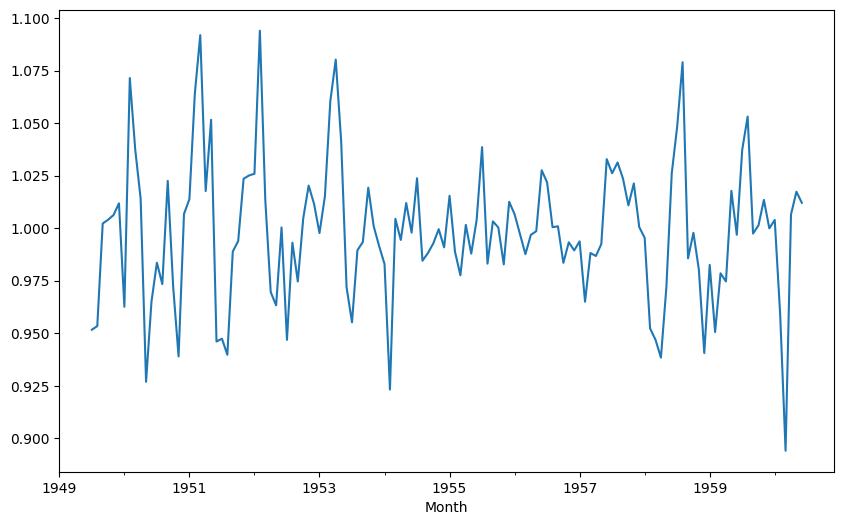

In [42]:
# 잔차 그림만 확인하기
multiple_results.resid.plot();

### Insights from Multiplicative Decomposition
1. 추세(Trend): 시간이 지남에 따라 승객 수가 지속적으로 증가하는 장기적 추세를 보임
2. 계절성(Seasonal): 연간 변동이 특정 시기에 정기적으로 반복 (승객 수의 증감)
3. 잔차(Residual): 추세와 계절성을 제거한 후 남는 불규칙한 변동의 정도가 일정하고 큰 이상치가 보이지 않아, 곱셈 분해가 해당 데이터셋에 잘 적용되었음을 확인 (안정적이고 낮은 변동성)

## 3. Transformation Time Series Data

- 데이터에 선형이 아닌 추세가 있고, 추세가 시간에 따라 변화하는 경우 추세를 선형화하여 분석을 용이하게 하기 위함
- 데이터의 계절성 변동이 시간에 따라 증감하는 경우(즉, 변동성이 비례적으로 증가하는 경우) 변동성 안정 가능
- 시계열 데이터의 분산이 시간에 따라 일정하지 않을 때, 분산을 균일하게 만들어 분석의 정확도를 높일 수 있음
- 데이터 이상치 영향력 최소화
- (ARIMA 등의) 통계 기반 시계열 분석은 데이터가 정상성(stationarity)을 가진다는 가정을 필요로 함 -> 해당 가정을 충족하지 않을 때 정상 시계열로 변환
    - 정상성(stationarity): 데이터의 통계량(평균, 분산 등)이 시간에 따라 일정하다는 것을 의미

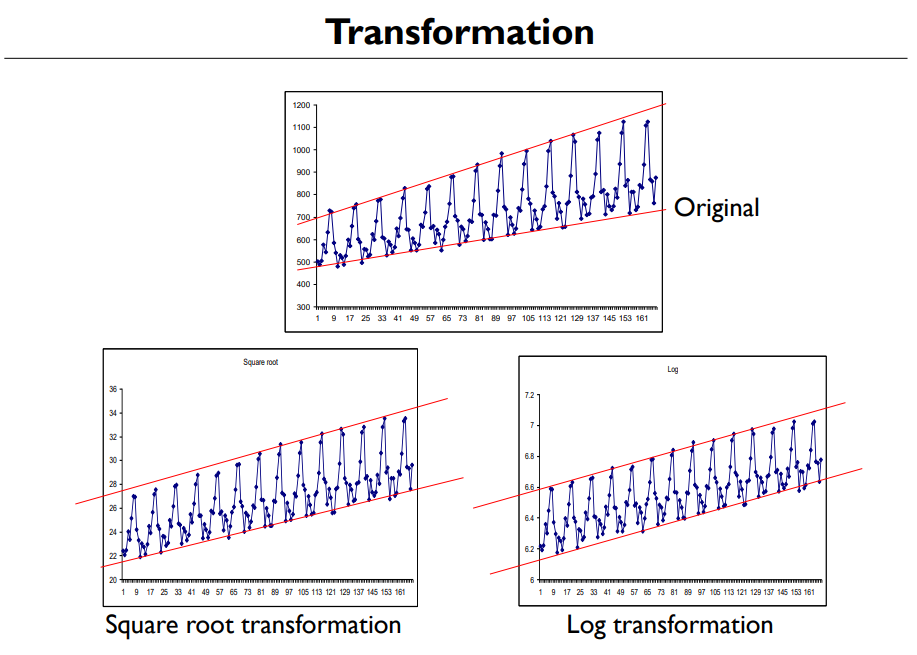

In [43]:
Image("./image/1-5.PNG")
# Image('/content/2024_LGE_TimeSeries/image/1-5.PNG') # colab

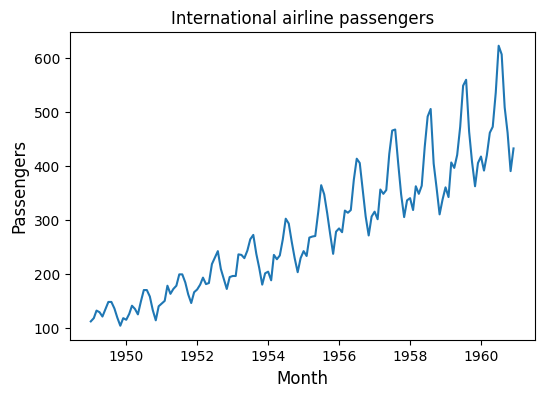

In [44]:
# 원본 시계열 데이터 시각화
fig = plt.figure(figsize=(6,4))
plt.plot(airline_data['passengers']) #변동폭이 점점 커지는 것을 확인 가능함
plt.title('International airline passengers', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Passengers', fontsize=12)

plt.show()

### Square Root Transformation
- 데이터의 값이 더 커질 수록 변동이 커지는 경우에 적용
- 큰 값에 의해 야기된 변동성을 줄이는 효과

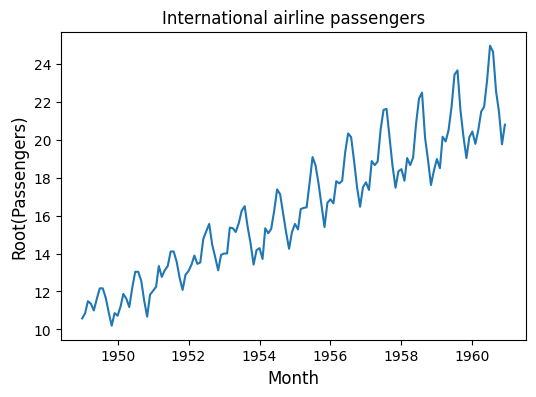

In [45]:
# 제곱근 시계열 데이터 시각화
airline_data['squared_passengers'] = np.sqrt(airline_data['passengers'])  # square root

fig = plt.figure(figsize=(6,4))
plt.plot(airline_data['squared_passengers'])
plt.title('International airline passengers', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Root(Passengers)', fontsize=12)

plt.show()

### Log Transformation
- 로그 변환은 데이터의 지수적인 성장 또는 감소 패턴을 선형화하고, 비례적인 변동성을 안정화하는 데 사용
- 데이터 스케일을 축소하여 이상치의 영향력을 감소시킴

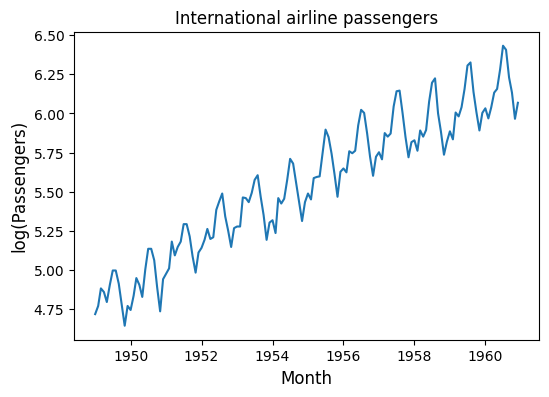

In [46]:
# 로그 시계열 데이터 시각화
airline_data['log_passengers'] = np.log(airline_data['passengers'])

fig = plt.figure(figsize=(6,4))
plt.plot(airline_data['log_passengers'])
plt.title('International airline passengers', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('log(Passengers)', fontsize=12)

plt.show()

## 4. 모델링 (No-trend, Linear-trend, and Quadratic-trend Model)

- 시계열 데이터의 추세(Trend)를 모델링

### 1. No-trend Model
- 시계열 데이터에 명확한 추세가 없는 경우 (시간이 지남에 따라 데이터가 상승하거나 하락하는 일관된 경향 없음)
- 데이터가 주로 계절성이나 다른 형태의 변동성에 의해 움직이는 경우에 사용됨
- $Y_t=\beta_{0}+\epsilon_{t}$, 여기서 $Y_t$는 시간 $t$에서의 관측 값, $\beta_{0}$는 절편이며 $t$와 관계가 없어 변하지 않는 상수 값, $\epsilon_{t}$는 오차항을 의미

In [47]:
# 데이터 읽기
no_trend_data = pd.read_csv('./dataset/no-trend-data.csv')

# 코랩과 깃허브 연동하시는 분들
## no_trend_data = pd.read_csv('/content/2024_LGE_TimeSeries/dataset/no-trend-data.csv')

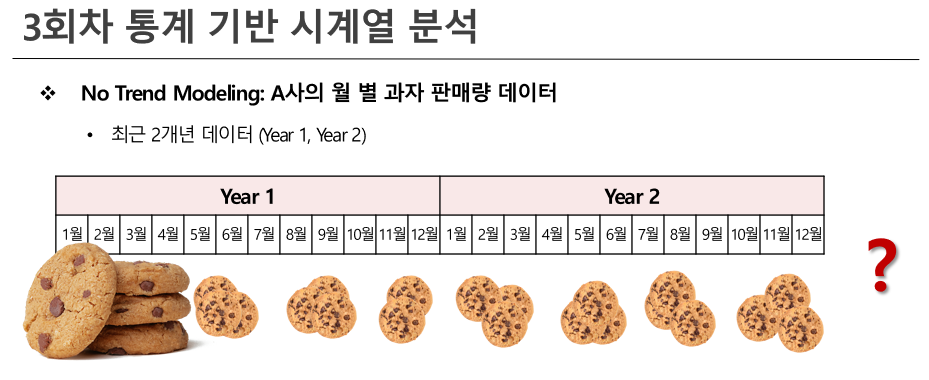

In [48]:
Image('image/1-4.PNG') # 로컬 사용시
# Image('/content/2024_LGE_TimeSeries/image/1-4.PNG') # colab 사용시

In [49]:
# 총 24개월간의 월간 데이터가 수집되어 있는 것을 확인할 수 있음
no_trend_data

,Month,year1,year2
0,1,362,276
1,2,381,334
2,3,317,394
3,4,297,334
4,5,399,384
5,6,402,314
6,7,375,344
7,8,349,337
8,9,386,345
9,10,328,362


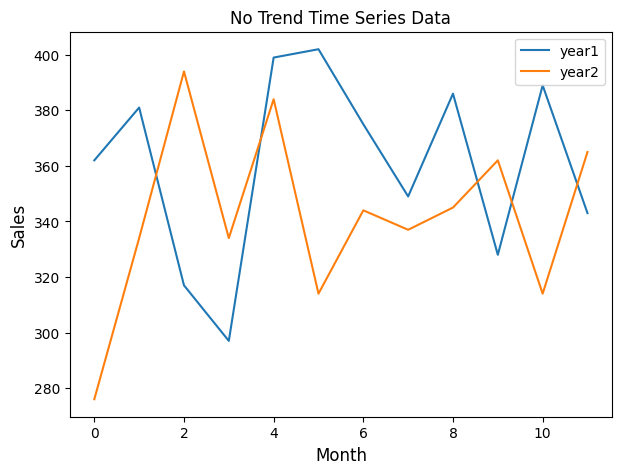

In [50]:
# 데이터 시각화
fig = plt.figure(figsize=(7,5)) # 그림 가로 세로 길이를 조절할 수 있음
plt.plot(no_trend_data['year1'], label='year1') # 어떤 요소를 그릴 것인지? + 해당 plot은 어떤 값을 의미하고 있는지 (label)
plt.plot(no_trend_data['year2'], label='year2') # 어떤 요소를 그릴 것인지? + 해당 plot은 어떤 값을 의미하고 있는지 (label)
plt.title('No Trend Time Series Data', fontsize=12) # 그림 제목 명명
plt.xlabel('Month', fontsize=12) # 그림 내 X축 이름 명명
plt.ylabel('Sales', fontsize=12) # 그림 내 Y축 이름 명명
plt.legend()  # label에 따른 범례 추가

# 그려진 그림 출력
plt.show();

In [51]:
# No-trend model; 평균값 예측
pred_no_trend = (np.mean(no_trend_data['year1']) + np.mean(no_trend_data['year2']))/2
print(pred_no_trend)

351.2916666666667


- 추세가 없는 모델에서는 시간에 따른 판매량 증감이 없다고 가정하기에, 이에 따라 미래의 어떤 월에 대해서도 판매량에 대한 가장 좋은 예측치는 **지난 데이터의 단순 평균 값**으로 가정됨
- 두 해에 걸쳐 판매량 데이터가 제공되기 때문에 각 해의 월별 데이터를 동일하게 취급하여 일관된 예측 값 생성
- No Trend Model에서는 $\hat\beta_{0}$이 (모든 미래의 월에 대한) 예측치가 되는 것

In [52]:
# pandas.concat([], axis= 0 or 1); 데이터 병합을 수행할 때 사용하는 함수
# axis=0 --> 행 별로 병합, axis=1 --> 컬럼 별로 병합

x = pd.concat([no_trend_data['Month'], no_trend_data['Month']+12], axis=0)
y1 = pd.concat([no_trend_data['year1'], no_trend_data['year2']], axis=0)

y2 = np.full(24, [pred_no_trend]) # pred_no_trend 값을 24개만큼 복사

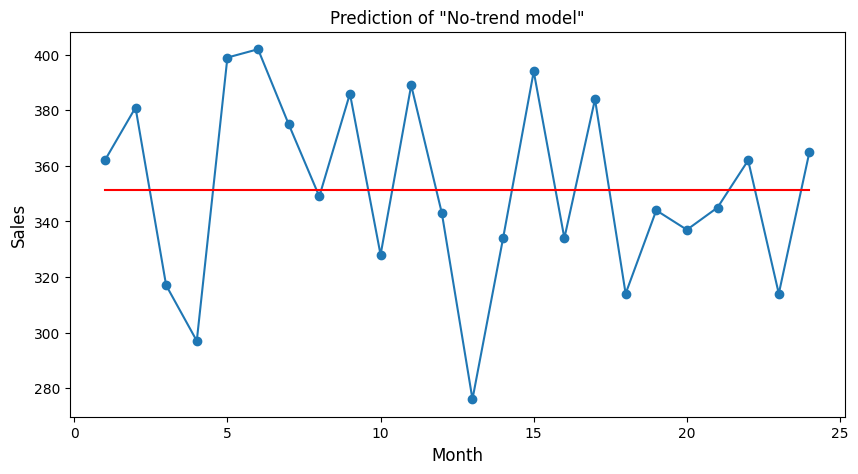

In [53]:
# 예측값과 실제값을 시각화하여 얼마만큼 잘 예측하고 있는지를 정성적으로 평가

fig = plt.figure(figsize=(10,5))

plt.plot(x, y1, marker="o")  # 그래프 그리기 + marker은 데이터 포인트 하나하나를 "o" 형태로 표현하는 것을 의미
plt.plot(x, y2, color='r')   # 예측 값(pred_no_trend) 시각화
plt.title('Prediction of "No-trend model"', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.rc('xtick', labelsize=10) # 축의 눈금선을 tick이라 부르며, tick 글씨 크기를 조절
plt.rc('ytick', labelsize=10)
plt.show();

### 2. Linear-trend Model
- 시계열 데이터가 시간에 따라 일정한 속도로 증가하거나 감소하는 선형 추세를 가지는 경우
- 데이터가 꾸준한 상승 또는 하락 추세를 보일 때 적합
- $Y_t=\beta_{0}+\beta_{1}t+\epsilon_{t}$, 여기서 $\beta_{1}t$는 시간에 따른 변화율을 나타내는 기울기(slope)

In [54]:
# 데이터 읽기
linear_data = pd.read_csv('./dataset/linear-trend-data.csv')

# 코랩과 깃허브 연동하시는 분들
## linear_data = pd.read_csv('/content/2024_LGE_TimeSeries/dataset/linear-trend-data.csv')

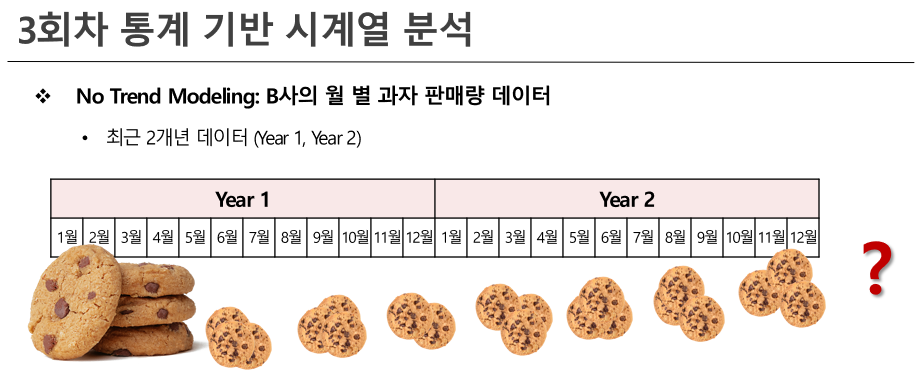

In [55]:
Image('image/1-4-2.PNG') # 로컬 사용시
# Image('/content/2024_LGE_TimeSeries/image/1-4-2.PNG') # colab 사용시

In [56]:
linear_data # 24개월(2개년) 간의 판매 기록량 데이터

,Time,Sales
0,1,197
1,2,211
2,3,203
3,4,247
4,5,239
5,6,269
6,7,308
7,8,262
8,9,258
9,10,256


In [57]:
# ols = ordinary least square = 선형 회귀 모델 호출
from statsmodels.formula.api import ols

# matplotlib와 유사한 종류의 시각화 패키지인 seaborn 호출
import seaborn as sns

In [58]:
# lienar-trend model, ols(종속변수 ~ 독립변수)
linear_model = ols('Sales ~ Time', data=linear_data).fit()

In [59]:
# linear-trend model 선형 회귀 모델의 beta 값 출력하기
linear_model.params

Intercept    198.028986
Time           8.074348
dtype: float64

In [60]:
# 선형 회귀 모델의 결과 summary.
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     74.75
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.59e-08
Time:                        12:27:08   Log-Likelihood:                -115.94
No. Observations:                  24   AIC:                             235.9
Df Residuals:                      22   BIC:                             238.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    198.0290     13.344     14.840      0.000     170.354     225.704
Time           8.0743      0.934      8.646      0.000       6.138      10.011
==============================================================================
Omnibus:                        2.625   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                1.244
Skew:                           0.491   Prob(JB):                        0.537
Kurtosis:                       3.528   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# 학습이 완료된 모델에 Time 데이터를 입력하여 예측하기
pred_linear = linear_model.predict(linear_data['Time']) ## Y\hat = beta_0 + beta_1*Time
pred_linear

0     206.103333
1     214.177681
2     222.252029
3     230.326377
4     238.400725
5     246.475072
6     254.549420
7     262.623768
8     270.698116
9     278.772464
10    286.846812
11    294.921159
12    302.995507
13    311.069855
14    319.144203
15    327.218551
16    335.292899
17    343.367246
18    351.441594
19    359.515942
20    367.590290
21    375.664638
22    383.738986
23    391.813333
dtype: float64

In [62]:
# 25월 달의 판매량을 예측 모델을 통해 예측
new_time = pd.DataFrame([25], columns=['Time']) # Time 값이 25를 갖는 데이터 생성
pred_new_time = linear_model.predict(new_time)
print(f'predition value when Time = 25 : {pred_new_time[0]:.2f}')

predition value when Time = 25 : 399.89


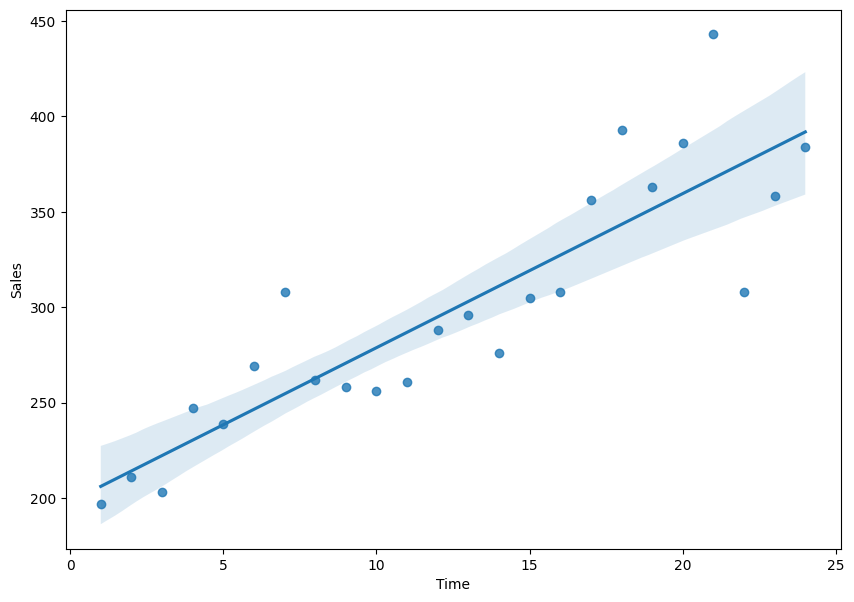

In [63]:
plt.rcParams['figure.figsize'] = (10,7)

# seaborn 패키지 내에서 기본적으로 선형회귀 모델을 자동으로 수행 후 시각화.
sns.regplot(x='Time', y='Sales', data=linear_data)
plt.show()

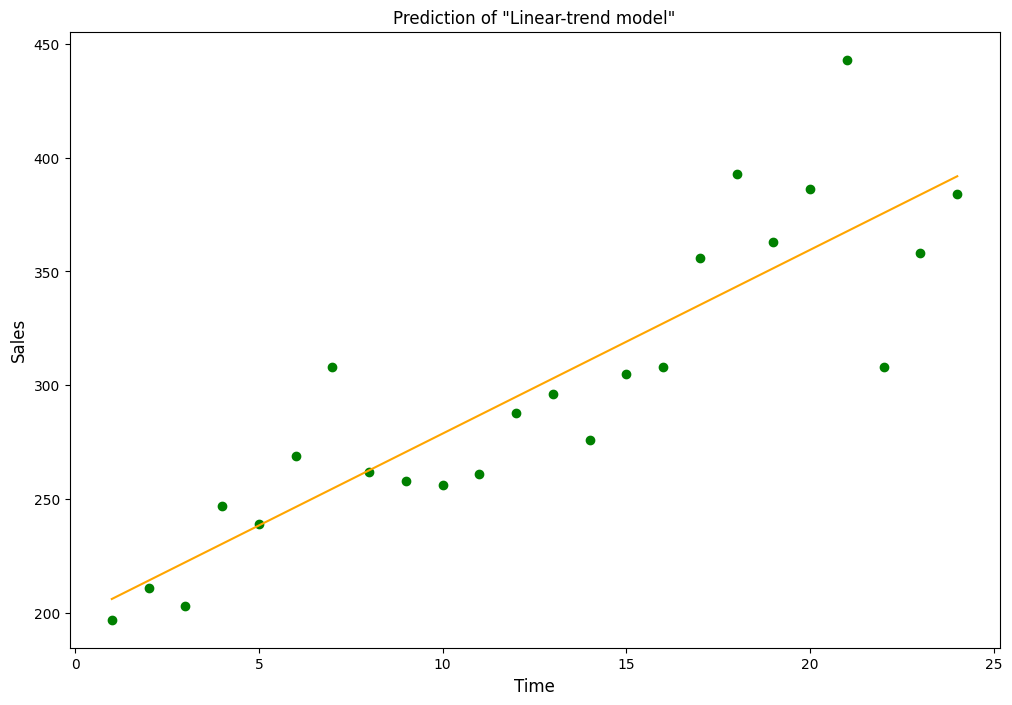

In [64]:
# seaborn 패키지가 아닌, 직접 학습해보았었던 예측 모델의 결과 시각화해보기
fig = plt.figure(figsize=(12,8))
plt.scatter(linear_data['Time'], linear_data['Sales'], color='g')
plt.plot(linear_data['Time'], pred_linear, color='orange')
plt.title('Prediction of "Linear-trend model"', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

### 3. Quadratic-trend Model
- 시계열 데이터가 시간에 따라 변화하는 속도가 가속되거나 감속되는 경우
- 데이터에 비선형 추세가 있을 때 적합
- $Y_t=\beta_{0}+\beta_{1}t+\beta_{2}t^2+\epsilon_{t}$, 여기서 $\beta_{2}t^2$는 시간의 제곱에 대한 계수로, 데이터의 가속도(변화율의 변화율)을 나타냄

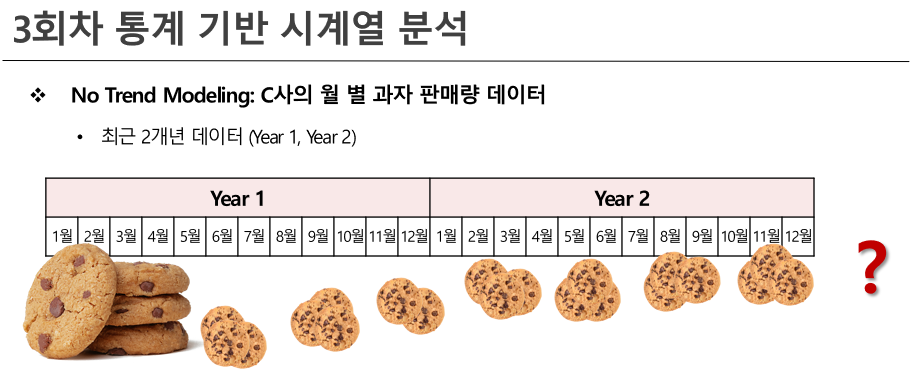

In [65]:
Image('image/1-4-3.PNG') # 로컬 사용시
# Image('/content/2024_LGE_TimeSeries/image/1-4-3.PNG') # colab 사용시

In [66]:
quadratic_data = pd.read_csv('./dataset/quadratic-trend-data.csv')
quadratic_data

# 코랩과 깃허브 연동하시는 분들
## quadratic_data = pd.read_csv('/content/2024_LGE_TimeSeries/dataset/quadratic-trend-data.csv')

,Time,Time_squared,Loan_request
0,1,1,297
1,2,4,249
2,3,9,340
3,4,16,406
4,5,25,464
5,6,36,481
6,7,49,549
7,8,64,553
8,9,81,556
9,10,100,642


In [67]:
# 읽었던 데이터의 컬럼명 확인하기
quadratic_data.columns

Index(['Time', 'Time_squared', 'Loan_request'], dtype='object')

In [68]:
# quadratic-trend 모델 학습하기, 종속변수 ~ 독립변수 1 + 독립변수 2 --> beta_0 + beta_1*Time + beta_2*Time^2
quadratic_model = ols('Loan_request ~ Time+Time_squared', data=quadratic_data).fit()

In [69]:
# 학습 결과 Summary
quadratic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Loan_request   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     802.3
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.47e-20
Time:                        12:27:09   Log-Likelihood:                -115.06
No. Observations:                  24   AIC:                             236.1
Df Residuals:                      21   BIC:                             239.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      199.6196     20.848      9.575      0.000     156.264     242.975
Time            50.9366      3.842     13.256      0.000      42.946      58.927
Time_squared    -0.5677      0.149     -3.805      0.001      -0.878      -0.257
==============================================================================
Omnibus:                        0.246   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.314
Skew:                           0.207   Prob(JB):                        0.855
Kurtosis:                       2.623   Cond. No.                         899.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# .predict 함수 이용하여 예측 결과 Y^hat 확인해보기
pred_quadra = quadratic_model.predict(quadratic_data[['Time', 'Time_squared']])
pred_quadra

0      249.988462
1      299.221906
2      347.319900
3      394.282441
4      440.109532
5      484.801171
6      528.357358
7      570.778094
8      612.063378
9      652.213211
10     691.227592
11     729.106522
12     765.850000
13     801.458027
14     835.930602
15     869.267726
16     901.469398
17     932.535619
18     962.466388
19     991.261706
20    1018.921572
21    1045.445987
22    1070.834950
23    1095.088462
dtype: float64

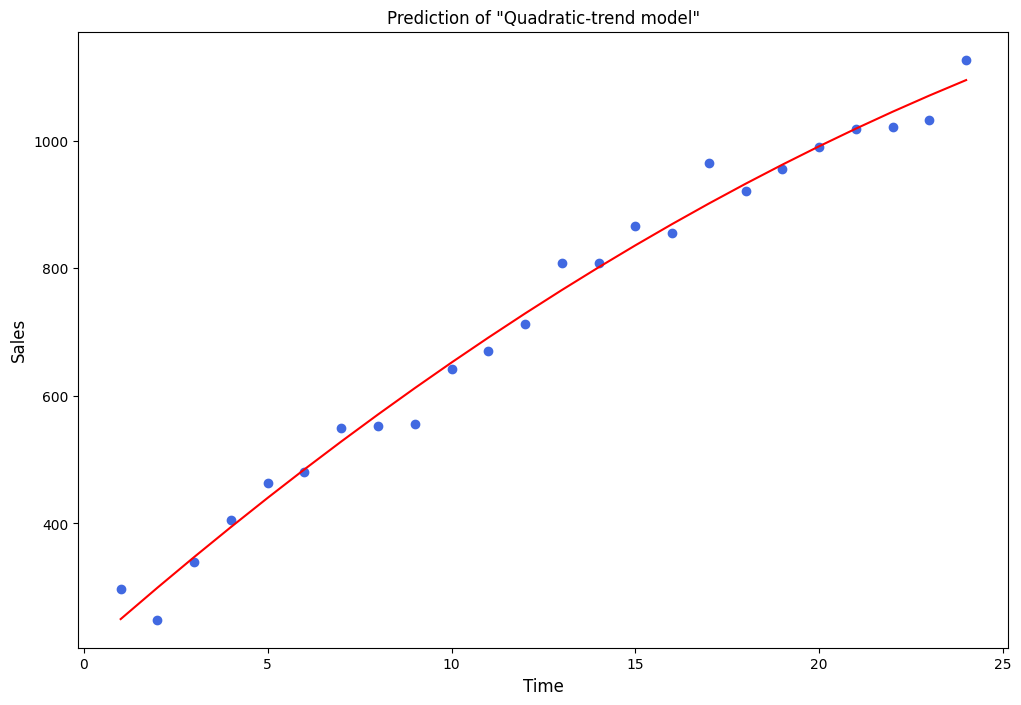

In [71]:
# Quadratic-trend model 예측 결과 시각화해보고 잘 예측되었는지 확인하기
fig = plt.figure(figsize=(12,8))

plt.scatter(quadratic_data['Time'], quadratic_data['Loan_request'], color='royalblue') # 실제 정답: quadratic_data['Loan_request']
plt.plot(quadratic_data['Time'], pred_quadra, color='red') # pred_quadra: 모델을 통해 예측한 값
plt.title('Prediction of "Quadratic-trend model"', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

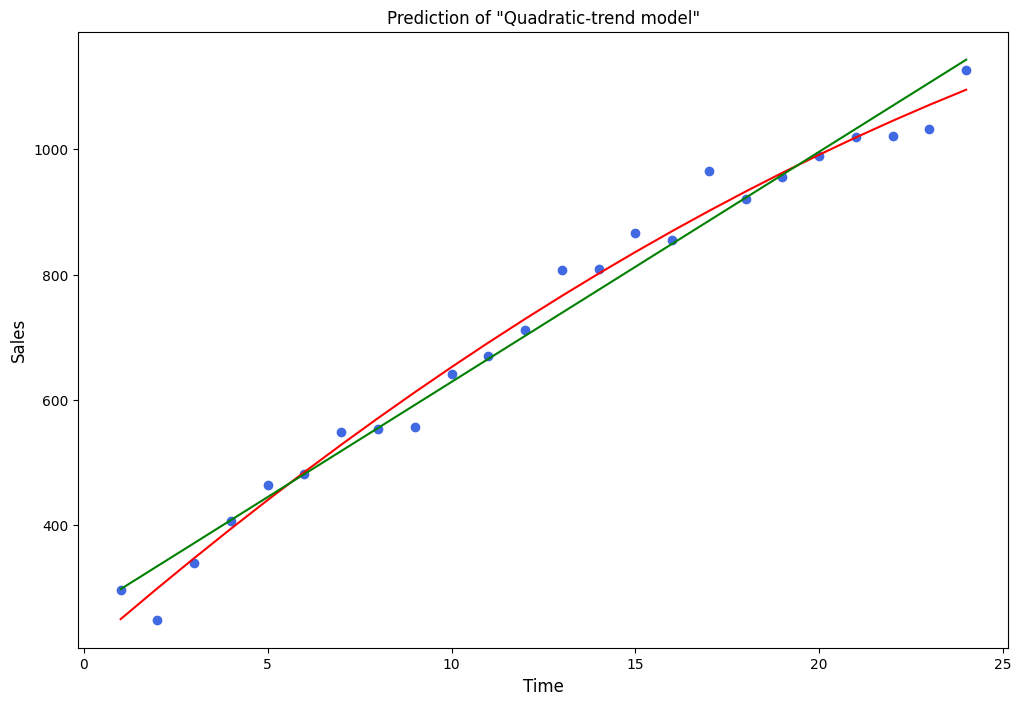

In [72]:
# 선형회귀 모델과 제곱선형회귀 모델의 예측 결과 비교해보기

linear_model_Loan = ols('Loan_request ~ Time', data=quadratic_data).fit()
pred_linear_Loan = linear_model_Loan.predict(quadratic_data['Time'])

fig = plt.figure(figsize=(12,8))
plt.scatter(quadratic_data['Time'], quadratic_data['Loan_request'], color='royalblue')
plt.plot(quadratic_data['Time'], pred_quadra, color='red')
plt.plot(quadratic_data['Time'], pred_linear_Loan, color='green')
plt.title('Prediction of "Quadratic-trend model"', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()